## Scratchpad

In [1]:
# Set up:
# %matplotlib widget
# %matplotlib inline
# %matplotlib ipympl
# %matplotlib notebook
import pandas as pd
import numpy as np

# Plotting Packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['figure.dpi'] = 150
savefig_options = dict(format="png", dpi=150, bbox_inches="tight")

# import plotly.graph_objects as go
# import plotly.express as px
# import ipywidgets as widget

# Computation packages
from scipy.spatial.distance import euclidean
from scipy.signal import find_peaks
from fastdtw import fastdtw

In [4]:
from nah.loader import load_raw_csv_data, load_npzs
from nah.utils import norm_data, full_align, full_joint_align, clean_rot_data, segment_by_demo,sum_of_squares

from nah.plot import plot_norm, plot_pos, plot_rot, plot_raw_data, plot_raw_data_subsampled,view_participant_robot_gesture, plot_rot_2D

In [5]:
## SCRATCHPAD STUFF BEGINS HERE

PID = 13
gesture_num=1
demo_num = 1
followup = False
demo_max=5

robot_name = "Reachy"
end_eff_name = "r_wrist2hand_"

# robot_name = "j2s6s300"
# end_eff_name = "j2s6s300_end_effector_"

end_eff_data, camera_data, rh_data, lh_data, joint_data = load_npzs(robot_name, PID, followup, gesture_num)

end_eff_multi_demo, camera, rh, lh, joints = segment_by_demo(end_eff_data, camera_data, rh_data, lh_data, joint_data, demo_max)
# end_eff = np.array(end_eff)
# temp = norm_data(sum_of_squares(rh[0]),sum_of_squares(rh[1]))
# temp = norm_data(sum_of_squares(end_eff[0]),sum_of_squares(end_eff[1]))
temp = norm_data(sum_of_squares(end_eff_multi_demo[0]),sum_of_squares(end_eff_multi_demo[1]))
    # ax.set_title("DTW Alignment of Hand and URDF End-Effector Orientation", fontsize=20, fontweight="bold")
# plt.savefig('DTW_UnitTest.png')
    # plt.close('all')

In [6]:
    # Ideally, also need to normalize by participant height (wingspan)
    # And clip ends (~1sec at beginning, 2sec at end (but DTW should help with this))
    # np.where(time_hand_aligned>time_hand_aligned[0]+1)[0][0]

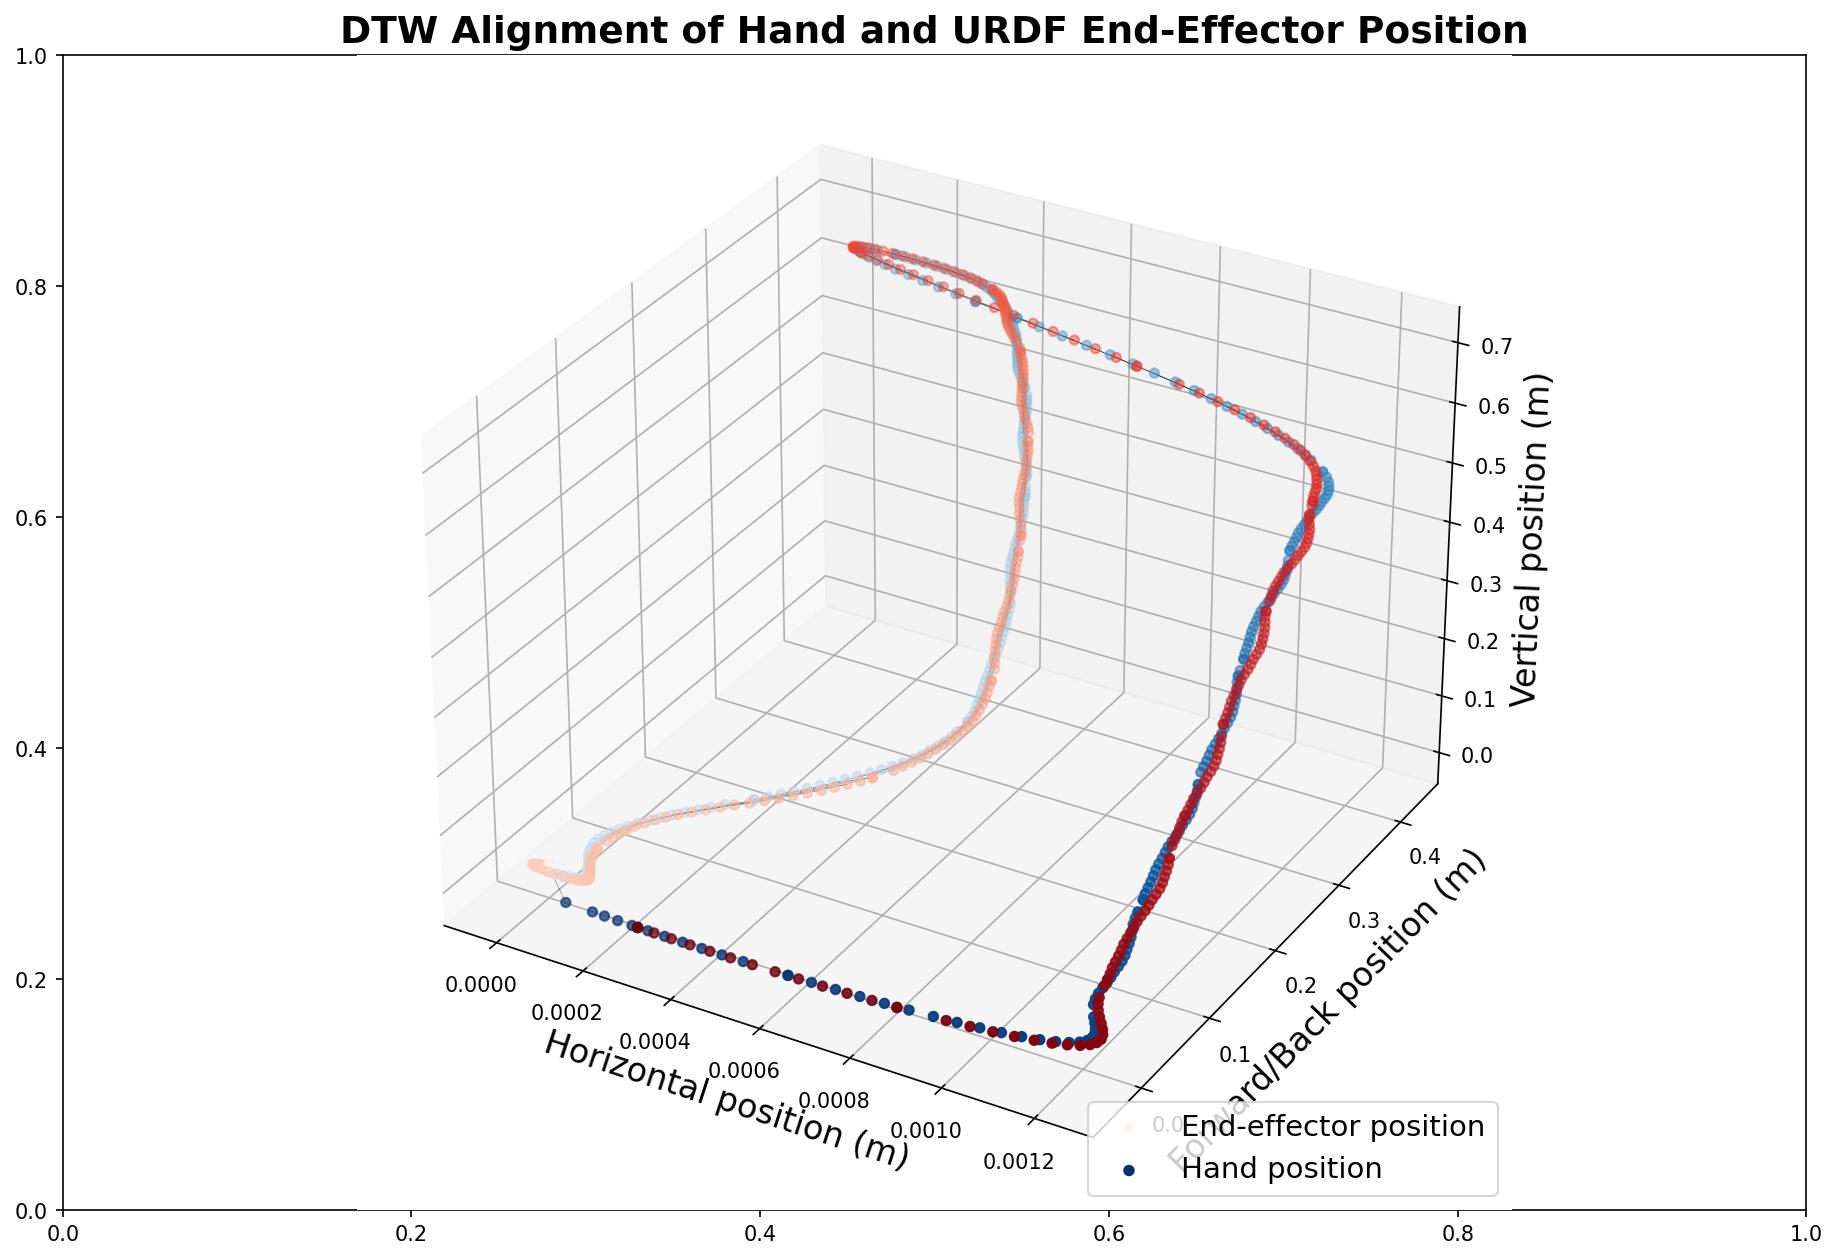

In [7]:
traj1 = end_eff_multi_demo[0]
traj2 = end_eff_multi_demo[1]

try:
    # Test run for now, with robot end-effector demos. (Should be identical and need no alignment)
    warp_path, _, _ = norm_data(sum_of_squares(traj1),sum_of_squares(traj2)) 
except:
    print("Warp data failed")
    raise
try:
    time_URDF_aligned, time_hand_aligned, end_eff_pos_aligned, end_eff_rot_aligned, hand_pos_aligned, hand_rot_aligned = \
        full_align(warp_path, traj1, traj2)
    hand_rot_aligned = clean_rot_data(gesture_num, demo_num, hand_rot_aligned)
    # plot_rot_2D(time_hand_aligned, hand_rot_aligned)
    hand_rot_aligned = clean_rot_data(gesture_num, demo_num, hand_rot_aligned) #Seems to work better if you do it twice for some reason
    # plot_rot_2D(time_hand_aligned, hand_rot_aligned)
except:
    print("Align data failed")
    raise 
try:
    plot_pos(gesture_num, demo_num, warp_path, end_eff_pos_aligned, hand_pos_aligned, time_URDF_aligned, time_hand_aligned)
    plot_rot(gesture_num, demo_num, warp_path, end_eff_rot_aligned, hand_rot_aligned, time_URDF_aligned, time_hand_aligned)
except:
    print("Plot data failed")
    raise

In [ ]:
warp_path = norm_data(sum_of_squares(rh,0), sum_of_squares(rh,1))

In [ ]:
end_eff.shape

In [ ]:
temp1=sum_of_squares(end_eff,0)
temp2=sum_of_squares(end_eff,1)
# warp_path = norm_data(temp1,temp2)

In [ ]:
fig, ax = plt.subplots(figsize=(6,2))
fig.patch.set_visible(True)
ax.axis('on')
# ax = plt.axes(projection='3d')  
# ax.view_init(30,60)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

peaks, _ = find_peaks(end_eff_data[:,0], height=0)
ax.plot(end_eff_data[:,0])
ax.scatter(peaks,end_eff_data[peaks,0])

demo_max=2
end_eff=['']*demo_max
rh     =['']*demo_max
lh     =['']*demo_max
joints =['']*demo_max

for i in range(0,demo_max):
    if i==0:
        end_eff[i] = end_eff_data[1:peaks[0],:]
        rh[i]      =      rh_data[1:peaks[0],:]
        lh[i]      =      lh_data[1:peaks[0],:]
        joints[i]  =   joint_data[1:peaks[0],:]
    else:
        end_eff[i] = end_eff_data[peaks[i-1]:peaks[i],:]
        rh[i]      =      rh_data[peaks[i-1]:peaks[0],:]
        lh[i]      =      lh_data[peaks[i-1]:peaks[0],:]
        joints[i]  =   joint_data[peaks[i-1]:peaks[0],:]


In [ ]:
fig, ax = plt.subplots(figsize=(6,2))
fig.patch.set_visible(True)
ax.axis('on')
ax.plot(end_eff[0][:,0],end_eff[0][:,1],label="X pos")
ax.plot(end_eff[0][:,0],end_eff[0][:,2],label="Y pos")
ax.plot(end_eff[0][:,0],end_eff[0][:,3],label="Z pos")
ax.plot(end_eff[0][:,0],end_eff[0][:,4],label="X rot")
ax.plot(end_eff[0][:,0],end_eff[0][:,5],label="Y rot")
ax.plot(end_eff[0][:,0],end_eff[0][:,6],label="Z rot")

ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.patch.set_visible(True)
ax.axis('on')

ax = plt.axes(projection='3d')

ax.scatter(ja_data_aligned[...,2], ja_data_aligned[...,3], ja_data_aligned[...,4], \
          c=time_ja_aligned/max(time_ja_aligned), cmap='Reds', label='Joint Angle Values')
ax.scatter(hand_data_aligned[...,0]   , -hand_data_aligned[...,2]   , hand_data_aligned[...,1]   , \
          c=time_hand_aligned/max(time_hand_aligned), cmap='Blues', label='Hand position')

for [map_x, map_y] in warp_path_ja: 
    ax.plot3D([ja_data_aligned[map_x].T[2], hand_data_aligned[map_y].T[0]], \
              [ja_data_aligned[map_x].T[3], -hand_data_aligned[map_y].T[2]],\
              [ja_data_aligned[map_x].T[4], hand_data_aligned[map_y].T[1]], \
              '--k', linewidth=0.2)
    
ax.set_xlabel('Horizontal position')
ax.set_ylabel('Forward/Back position')
ax.set_zlabel('Vertical position')

ax.set_title("DTW Alignment of Hand Position and First Three URDF Joint Angles", fontsize=10, fontweight="bold")


In [ ]:
PID=1
gesture_num=1
demo_num = 1

end_eff_data, camera_data, rh_data, lh_data, joint_data = load_raw_csv_data(robot_name,end_eff_name, False, PID, gesture_num, demo_num)
# jointangle_data  = dtw_jointangles_import(gesture_num, demo_num)

hand_data[...,0]=hand_data[...,0]-min(hand_data[...,0])
joint_data[...,0]=joint_data[...,0]-min(joint_data[...,0])

dtw_distance, warp_path_ja = fastdtw(joint_data[...,0], hand_data[...,0], dist=euclidean) 

time_ja    = joint_data[...,0]
time_hand  = hand_data[...,0]

wp_size             = len(warp_path_ja)
time_ja_aligned     = np.zeros(wp_size)
time_hand_aligned   = np.zeros(wp_size)
ja_data_aligned     = np.zeros((wp_size,14))
hand_data_aligned   = np.zeros((wp_size,7))

for i, [map_x, map_y] in enumerate(warp_path_ja, start=0):   
    time_ja_aligned[i]   = time_ja[map_x]
    time_hand_aligned[i] = time_hand[map_y]
    ja_data_aligned[i]      = joint_data[map_x][:]
    hand_data_aligned[i]  = hand_data[map_y]
    
np.savez('ja_data_'+str(gesture_num)+'_'+str(demo_num),time_ja_aligned=time_ja_aligned, time_hand_aligned=time_hand_aligned,\
                hand_data_aligned=hand_data_aligned, ja_data_aligned=ja_data_aligned,gesture_num=gesture_num, demo_num=demo_num, warp_path=warp_path_ja)

In [ ]:
robot_name = "Reachy"
end_eff_name = "r_wrist2hand"

# robot_name = "j2s6s300"
# end_eff_name = "j2s6s300_end_effector"
PID = 0

for gesture_num in range(1,13):
#     print(gesture_num)
    fig, ax = plt.subplots(figsize=(15, 10))
    fig.patch.set_visible(True)
    ax.axis('on')

    ax = plt.axes(projection='3d')
    
    # for [map_x, map_y] in warp_path: 
    #     ax.plot3D([end_eff_pos_aligned[map_x].T[0], hand_pos_aligned[map_y].T[0]], \
    #               [end_eff_pos_aligned[map_x].T[2], -hand_pos_aligned[map_y].T[2]],\
    #               [end_eff_pos_aligned[map_x].T[1], hand_pos_aligned[map_y].T[1]], \
    #               '--k', linewidth=0.2)
   
    for demo_num in range(1,6):     
        data = np.load('data_PID'+str(PID)+"_"+str(robot_name)+"_gesture_"+str(gesture_num)+'_'+str(demo_num)+".npz")
        hand_pos_aligned = data['hand_pos_aligned'];
        end_eff_pos_aligned = data['end_eff_pos_aligned'];
        time_hand_aligned = data['time_hand_aligned']
        
        index = np.where(time_hand_aligned>time_hand_aligned[0]+1)[0][0]
        
        end_eff_pos_aligned = end_eff_pos_aligned - end_eff_pos_aligned[index];
        hand_pos_aligned = hand_pos_aligned - hand_pos_aligned[index];

        ax.scatter(end_eff_pos_aligned[...,0], end_eff_pos_aligned[...,2], end_eff_pos_aligned[...,1], \
                  c=1-time_hand_aligned/max(time_hand_aligned), cmap='Reds', label='Joint Angle Values')
        ax.scatter(hand_pos_aligned[...,0]   , -hand_pos_aligned[...,2]   , hand_pos_aligned[...,1]   , \
                  c=1-time_hand_aligned/max(time_hand_aligned), cmap='Blues', label='Hand position')

        print(gesture_num, demo_num)

    ax.set_xlabel('Horizontal position')
    ax.set_ylabel('Forward/Back position')
    ax.set_zlabel('Vertical position')
    ax.legend()

    ax.set_title("Raw RH Motion Data and URDF End-Effector Position", fontsize=20, fontweight="bold")
    # plt.savefig('Raw_visuals_'+robot_name+'_gesture'+str(gesture_num)+'.png')
    plt.close('all')



In [ ]:
#import cmasher as cmr

robot_name = "Reachy"
end_eff_name = "r_wrist2hand"
PID = 0

gesture_max = 13; #This stops the plots at 12, because gesture 13 only has 4 gestures (fix this in Unity)
cmap = plt.get_cmap('plasma')
#colors = cmr.take_cmap_colors('inferno', gesture_max)
slicedCM = cmap(np.linspace(0, 1, gesture_max)
c=slicedCM[Subjects.index(Subject)]


for gesture_num in range(1,13):
#     print(gesture_num)
    fig, ax = plt.subplots(figsize=(15, 10))
    fig.patch.set_visible(True)
    ax.axis('on')

    ax = plt.axes(projection='3d')
    
    # for [map_x, map_y] in warp_path: 
    #     ax.plot3D([end_eff_pos_aligned[map_x].T[0], hand_pos_aligned[map_y].T[0]], \
    #               [end_eff_pos_aligned[map_x].T[2], -hand_pos_aligned[map_y].T[2]],\
    #               [end_eff_pos_aligned[map_x].T[1], hand_pos_aligned[map_y].T[1]], \
    #               '--k', linewidth=0.2)
    
    for demo_num in range(1,6):     
        data = np.load('data_PID'+str(PID)+"_"+str(robot_name)+"_gesture_"+str(gesture_num)+'_'+str(demo_num)+".npz")
        hand_pos_aligned = data['hand_pos_aligned'];
        end_eff_pos_aligned = data['end_eff_pos_aligned'];
        time_hand_aligned = data['time_hand_aligned']
        
        index = np.where(time_hand_aligned>time_hand_aligned[0]+1)[0][0]
        
        end_eff_pos_aligned = end_eff_pos_aligned - end_eff_pos_aligned[index];
        hand_pos_aligned = hand_pos_aligned - hand_pos_aligned[index];

        ax.scatter(end_eff_pos_aligned[...,0], end_eff_pos_aligned[...,2], end_eff_pos_aligned[...,1], \
                  c=1-time_hand_aligned/max(time_hand_aligned), cmap='Reds', label='Joint Angle Values')
        ax.scatter(hand_pos_aligned[...,0]   , -hand_pos_aligned[...,2]   , hand_pos_aligned[...,1]   , \
                  c=1-time_hand_aligned/max(time_hand_aligned), cmap='Blues', label='Hand position')

#         print(gesture_num, demo_num)

    ax.set_xlabel('Horizontal position')
    ax.set_ylabel('Forward/Back position')
    ax.set_zlabel('Vertical position')
    ax.legend()

    ax.set_title("Raw RH Motion Data and URDF End-Effector Position", fontsize=20, fontweight="bold")
    plt.savefig('Raw_visuals_gesture'+str(gesture_num)+'.png')
    plt.close('all')

In [ ]:
np.where(time_hand_aligned>time_hand_aligned[0]+1)[0][0]